# 🎬 Netflix Movies & TV Shows Analysis
## Author: Your Name
### Description: Explore Netflix’s catalog to find content trends, genres, and regional preferences

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import os
os.makedirs("output_plots", exist_ok=True)

# 1. Load Sample Data

In [3]:
data = {
    "show_id": range(1, 21),
    "title": [
        "Movie A","Movie B","TV Show A","TV Show B","Movie C",
        "Movie D","TV Show C","Movie E","TV Show D","Movie F",
        "Movie G","TV Show E","Movie H","TV Show F","Movie I",
        "TV Show G","Movie J","TV Show H","Movie K","Movie L"
    ],
    "type": ["Movie","Movie","TV Show","TV Show","Movie",
             "Movie","TV Show","Movie","TV Show","Movie",
             "Movie","TV Show","Movie","TV Show","Movie",
             "TV Show","Movie","TV Show","Movie","Movie"],
    "director": [
        "Director 1","Director 2","Director 3","Director 1",None,
        "Director 2","Director 4","Director 5","Director 6","Director 7",
        None,"Director 8","Director 2","Director 9","Director 10",
        None,"Director 1","Director 11","Director 12","Director 3"
    ],
    "cast": [
        "Actor 1, Actor 2","Actor 3, Actor 4","Actor 5","Actor 6","Actor 7",
        "Actor 1, Actor 8","Actor 9","Actor 10","Actor 11","Actor 12",
        "Actor 13","Actor 14","Actor 15","Actor 16","Actor 17",
        "Actor 18","Actor 19","Actor 20","Actor 21","Actor 22"
    ],
    "country": [
        "India","USA","India","UK","USA","Canada","India","USA","India","Brazil",
        "USA","UK","India","USA","Canada","India","USA","USA","India","UK"
    ],
    "date_added": pd.date_range(start="2018-01-01", periods=20, freq="180D"),
    "release_year": [2017,2018,2019,2020,2015,2016,2020,2018,2021,2017,
                     2019,2020,2016,2015,2021,2022,2019,2020,2018,2017],
    "rating": ["PG","R","PG-13","PG","R","R","PG","PG-13","PG","R",
               "PG","PG-13","R","R","PG","PG","PG-13","PG","R","PG"],
    "duration": ["90 min","100 min","2 Seasons","3 Seasons","80 min",
                 "95 min","1 Season","110 min","2 Seasons","120 min",
                 "85 min","4 Seasons","130 min","2 Seasons","75 min",
                 "5 Seasons","105 min","1 Season","115 min","95 min"],
    "listed_in": [
        "Drama, Action","Comedy, Drama","Kids, Family","Drama","Horror",
        "Drama","Comedy","Romance","Drama","Action",
        "Comedy","Documentaries","Drama","Action","Kids",
        "Comedy","Thriller","Drama","Romance","Comedy"
    ]
}

df = pd.DataFrame(data)

print("✅ Sample Netflix Dataset Loaded")
df.head()

✅ Sample Netflix Dataset Loaded


,show_id,title,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,1,Movie A,Movie,Director 1,"Actor 1, Actor 2",India,2018-01-01,2017,PG,90 min,"Drama, Action"
1,2,Movie B,Movie,Director 2,"Actor 3, Actor 4",USA,2018-06-30,2018,R,100 min,"Comedy, Drama"
2,3,TV Show A,TV Show,Director 3,Actor 5,India,2018-12-27,2019,PG-13,2 Seasons,"Kids, Family"
3,4,TV Show B,TV Show,Director 1,Actor 6,UK,2019-06-25,2020,PG,3 Seasons,Drama
4,5,Movie C,Movie,None,Actor 7,USA,2019-12-22,2015,R,80 min,Horror


# 2. Data Cleaning

In [4]:
# Handle missing values
df["director"].fillna("Unknown", inplace=True)

# Extract year from date_added
df["year_added"] = pd.to_datetime(df["date_added"]).dt.year

# Create "Content Age"
df["content_age"] = 2023 - df["release_year"]

# Categorize movies by duration
def categorize_duration(x):
    if "min" in x:
        mins = int(x.split()[0])
        if mins < 90: return "Short"
        elif 90 <= mins <= 120: return "Medium"
        else: return "Long"
    else:
        return "TV Show"

df["duration_category"] = df["duration"].apply(categorize_duration)

df.head()

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_4040\1589913676.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna("Unknown", inplace=True)


,show_id,title,type,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,content_age,duration_category
0,1,Movie A,Movie,Director 1,"Actor 1, Actor 2",India,2018-01-01,2017,PG,90 min,"Drama, Action",2018,6,Medium
1,2,Movie B,Movie,Director 2,"Actor 3, Actor 4",USA,2018-06-30,2018,R,100 min,"Comedy, Drama",2018,5,Medium
2,3,TV Show A,TV Show,Director 3,Actor 5,India,2018-12-27,2019,PG-13,2 Seasons,"Kids, Family",2018,4,TV Show
3,4,TV Show B,TV Show,Director 1,Actor 6,UK,2019-06-25,2020,PG,3 Seasons,Drama,2019,3,TV Show
4,5,Movie C,Movie,Unknown,Actor 7,USA,2019-12-22,2015,R,80 min,Horror,2019,8,Short


# 3. Analysis & Visualization
Number of Releases per Year

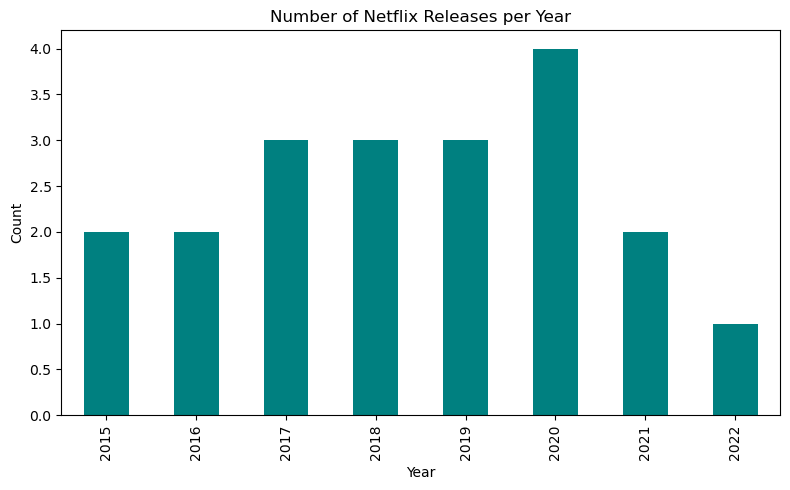

In [5]:
releases = df.groupby("release_year")["show_id"].count()

plt.figure(figsize=(8,5))
releases.plot(kind="bar", color="teal")
plt.title("Number of Netflix Releases per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("output_plots/releases_per_year.png")
plt.show()

# Movies vs. TV Shows Distribution

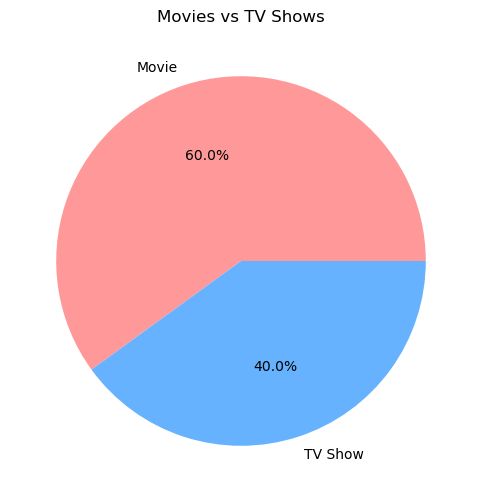

In [6]:
plt.figure(figsize=(6,6))
df["type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["#FF9999","#66B2FF"])
plt.title("Movies vs TV Shows")
plt.ylabel("")
plt.savefig("output_plots/movies_vs_tvshows.png")
plt.show()

# Top Genres

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_4040\1380341125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette="viridis")


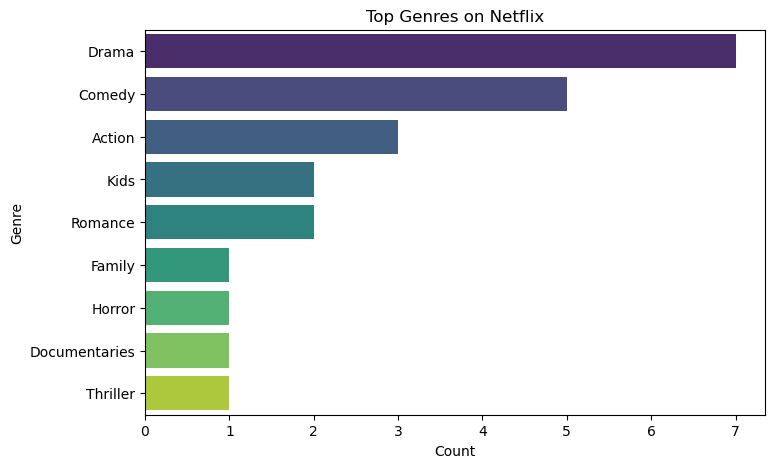

In [7]:
genres = df["listed_in"].str.split(", ").explode().value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=genres.values, y=genres.index, palette="viridis")
plt.title("Top Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.savefig("output_plots/top_genres.png")
plt.show()

# Content by Country

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_4040\3466607506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="Set2")


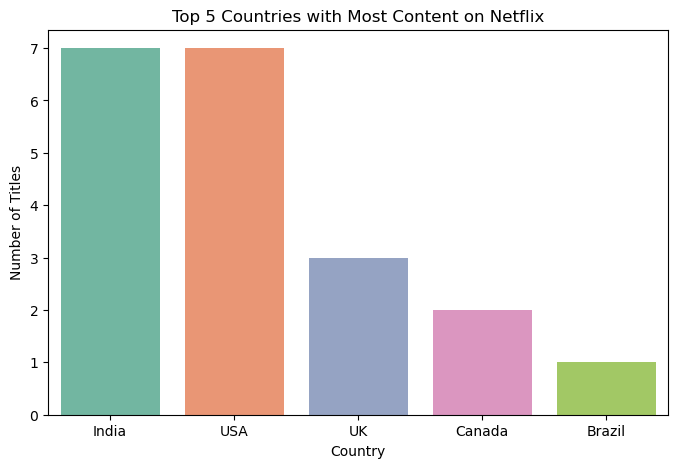

In [9]:
country_counts = df["country"].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="Set2")
plt.title("Top 5 Countries with Most Content on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.savefig("output_plots/content_by_country.png")
plt.show()

# Word Cloud of Directors

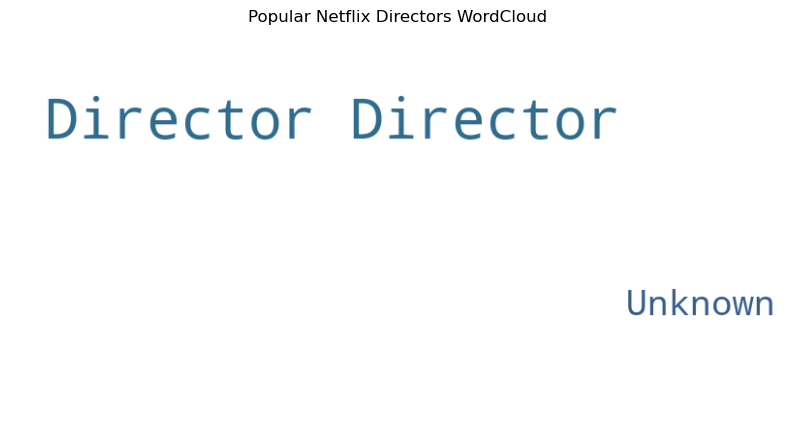

In [11]:
text = " ".join(df["director"].dropna())
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Popular Netflix Directors WordCloud")
plt.savefig("output_plots/directors_wordcloud.png")
plt.show()

# 📌 Outcome

- USA & India dominate Netflix’s catalog.
- Drama & Comedy are the most common genres.
- Movies still outnumber TV Shows, but shows are rising.
- Word cloud highlights popular directors across Netflix.